In [56]:
# imports and setup 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd

# cheese-maze-1 and cheese-maze 2 run with exploration=0.1, cheese value = default, ct-depth=256, horizon=16.
# cheese-maze 3: explore = 0.99, explore_decay = 0.999, cheese value = 100, ct-depth=256,horizon=16.
# cheese-maze 4: explore = 0.99, explore_decay = 0.999, cheese value = 10, ct-depth=128, horizon = 16.
data = pd.read_csv('../logs/tictactoe-jarryd-2.csv',sep=', ',engine='python')
data['game_end'] = np.zeros(len(data))
print data.tail()

       global_cycle  cycle  observation  reward  action  explore_on  explored  \
9999           9999     13       156837       0       3           1         1   
10000         10000     14       156837       0       5           0         0   
10001         10001     15       156837       0       2           0         0   
10002         10002     16       156837       0       4           0         0   
10003         10003     17       157093       4       0          -1        -1   

       explore_rate_g  total reward  average reward  game_end  
9999              0.9            15        1.071430         0  
10000             0.9            15        1.000000         0  
10001             0.9            15        0.937500         0  
10002             0.9            15        0.882353         0  
10003            -1.0            19        1.117650         0  


In [57]:
df = np.array(data[['cycle','reward','explore_on']])

dat = []
ave = [0]
cheesemaze_offset=3
jdx = 0
for idx in xrange(1,len(df)):
    if df[idx,2]==1:
        continue
    
    if df[idx,2] == -1 and df[idx-1,2] == 1:
        continue
    df[idx,1]-=cheesemaze_offset
    dat.append(df[idx,1])
    jdx += 1

    ave.append(ave[jdx-1]*float(jdx-1)/jdx + (1.0/jdx) * df[idx,1])
dat = np.array(dat)
ave = np.array(ave)
print dat

[-3 -3 -3 ..., -3 -3  1]


In [49]:
for idx in xrange(1,len(df))

<type 'numpy.ndarray'>


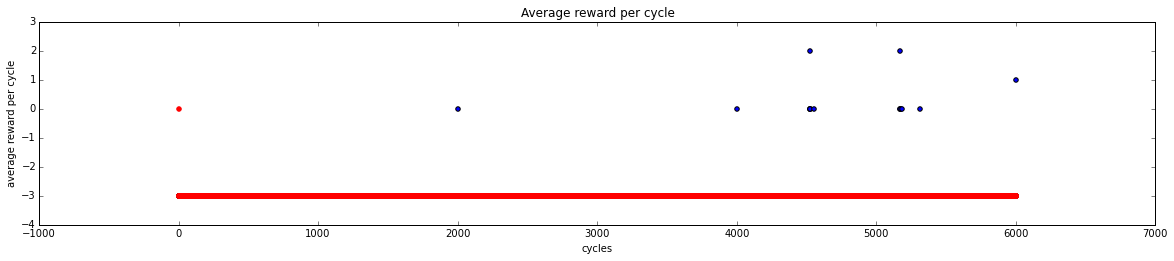

In [58]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(211)
ax.set_title('Average reward per cycle')
ax.set_xlabel('cycles')
ax.set_ylabel('average reward per cycle')
#ax.scatter(dat[:,0],dat[:,1])
ax.scatter(np.arange(len(dat)),dat)
ax.scatter(np.arange(len(ave)),ave,color='red')